機械学習の演習課題

線形回帰で燃費予想を行う

In [1]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
os.getcwd()

'C:\\Users\\User\\Desktop\\AI講座用フォルダ\\4_後半通し課題データ\\notebook'

生データをデータの読み込み、表示する

In [3]:
#ファイル選択
df_car_consume = pd.read_csv(r"..\car-consume\measurements.csv")

#頭と尻の10行づつ表示
display(df_car_consume.head(10))
display(df_car_consume.tail(10))

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
5,"8,3","6,4",50,"21,5",10,NaN,E10,0,0,0,NaN,NaN
6,"7,8","4,4",43,"21,5",11,NaN,E10,0,0,0,NaN,NaN
7,"12,3",5,40,"21,5",6,NaN,E10,0,0,0,NaN,NaN
8,"4,9","6,4",26,"21,5",4,NaN,E10,0,0,0,NaN,NaN
9,"11,9","5,3",30,"21,5",9,NaN,E10,0,0,0,NaN,NaN


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
378,"16,2","4,4",39,"24,5",17,ac,SP98,1,0,0,NaN,NaN
379,"16,7","3,8",44,"24,5",23,sun,SP98,0,0,1,NaN,NaN
380,"8,3",5,52,"24,5",27,NaN,SP98,0,0,0,NaN,NaN
381,"5,5","3,7",33,"24,5",28,sun,SP98,0,0,1,NaN,NaN
382,"13,6","3,7",33,"24,5",28,sun,SP98,0,0,1,NaN,NaN
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN
387,"14,7",5,25,25,30,AC,SP98,1,0,0,NaN,NaN


カンマとピリオドの表記が異なっているため、直さないといけない。
replace(',', '.')を使う

In [4]:
#入れ替え
df_car_consume = pd.read_csv(r"..\car-consume\measurements.csv")
df_car_consume = df_car_consume.replace(',','.',regex = True)
df_car_consume["distance"] = df_car_consume["distance"].astype(np.float64)
df_car_consume["consume"] = df_car_consume["consume"].astype(np.float64)
df_car_consume["temp_inside"] = df_car_consume["temp_inside"].astype(np.float64)

#頭と尻の10行づつ表示
display(df_car_consume.head(10))
display(df_car_consume.tail(10))

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
5,8.3,6.4,50,21.5,10,NaN,E10,0,0,0,NaN,NaN
6,7.8,4.4,43,21.5,11,NaN,E10,0,0,0,NaN,NaN
7,12.3,5.0,40,21.5,6,NaN,E10,0,0,0,NaN,NaN
8,4.9,6.4,26,21.5,4,NaN,E10,0,0,0,NaN,NaN
9,11.9,5.3,30,21.5,9,NaN,E10,0,0,0,NaN,NaN


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
378,16.2,4.4,39,24.5,17,ac,SP98,1,0,0,NaN,NaN
379,16.7,3.8,44,24.5,23,sun,SP98,0,0,1,NaN,NaN
380,8.3,5.0,52,24.5,27,NaN,SP98,0,0,0,NaN,NaN
381,5.5,3.7,33,24.5,28,sun,SP98,0,0,1,NaN,NaN
382,13.6,3.7,33,24.5,28,sun,SP98,0,0,1,NaN,NaN
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN
387,14.7,5.0,25,25.0,30,AC,SP98,1,0,0,NaN,NaN


燃料種も追加変更してみる。

In [5]:
#ガス種コピー
df_car_consume["gas_type_int"] = df_car_consume["gas_type"].replace({'E10':1,"SP98":0})

#頭と尻の10行づつ表示
display(df_car_consume.head(10))
display(df_car_consume.tail(10))

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas,gas_type_int
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45,E10,1
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN,1
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN,1
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN,1
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN,1
5,8.3,6.4,50,21.5,10,NaN,E10,0,0,0,NaN,NaN,1
6,7.8,4.4,43,21.5,11,NaN,E10,0,0,0,NaN,NaN,1
7,12.3,5.0,40,21.5,6,NaN,E10,0,0,0,NaN,NaN,1
8,4.9,6.4,26,21.5,4,NaN,E10,0,0,0,NaN,NaN,1
9,11.9,5.3,30,21.5,9,NaN,E10,0,0,0,NaN,NaN,1


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas,gas_type_int
378,16.2,4.4,39,24.5,17,ac,SP98,1,0,0,NaN,NaN,0
379,16.7,3.8,44,24.5,23,sun,SP98,0,0,1,NaN,NaN,0
380,8.3,5.0,52,24.5,27,NaN,SP98,0,0,0,NaN,NaN,0
381,5.5,3.7,33,24.5,28,sun,SP98,0,0,1,NaN,NaN,0
382,13.6,3.7,33,24.5,28,sun,SP98,0,0,1,NaN,NaN,0
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN,0
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN,0
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN,0
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN,0
387,14.7,5.0,25,25.0,30,AC,SP98,1,0,0,NaN,NaN,0


欠損値が無いか確認を行う。 count()関数なり。

In [6]:
df_car_consume.count()

distance         388
consume          388
speed            388
temp_inside      376
temp_outside     388
specials          93
gas_type         388
AC               388
rain             388
sun              388
refill liters     13
refill gas        13
gas_type_int     388
dtype: int64

temp_insideに欠損値があるみたい。
とりあえず、平均値で埋めることにしてみる。
temp_insideの平均値をまず求める。

In [7]:
df_car_consume["temp_inside"].mean()

21.929521276595743

In [8]:
#平均値でリプレイスする
ave = df_car_consume["temp_inside"].mean()
df_car_consume["temp_inside"] = df_car_consume["temp_inside"].fillna(ave)
df_car_consume.count()

distance         388
consume          388
speed            388
temp_inside      388
temp_outside     388
specials          93
gas_type         388
AC               388
rain             388
sun              388
refill liters     13
refill gas        13
gas_type_int     388
dtype: int64

In [9]:
#頭と尻の10行づつ表示
display(df_car_consume.head(10))
display(df_car_consume.tail(10))

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas,gas_type_int
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45,E10,1
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN,1
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN,1
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN,1
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN,1
5,8.3,6.4,50,21.5,10,NaN,E10,0,0,0,NaN,NaN,1
6,7.8,4.4,43,21.5,11,NaN,E10,0,0,0,NaN,NaN,1
7,12.3,5.0,40,21.5,6,NaN,E10,0,0,0,NaN,NaN,1
8,4.9,6.4,26,21.5,4,NaN,E10,0,0,0,NaN,NaN,1
9,11.9,5.3,30,21.5,9,NaN,E10,0,0,0,NaN,NaN,1


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas,gas_type_int
378,16.2,4.4,39,24.5,17,ac,SP98,1,0,0,NaN,NaN,0
379,16.7,3.8,44,24.5,23,sun,SP98,0,0,1,NaN,NaN,0
380,8.3,5.0,52,24.5,27,NaN,SP98,0,0,0,NaN,NaN,0
381,5.5,3.7,33,24.5,28,sun,SP98,0,0,1,NaN,NaN,0
382,13.6,3.7,33,24.5,28,sun,SP98,0,0,1,NaN,NaN,0
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN,0
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN,0
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN,0
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN,0
387,14.7,5.0,25,25.0,30,AC,SP98,1,0,0,NaN,NaN,0


こんな↑感じのデータ。

各カラムの意味は以下の通り。

・distance is the distance inkilometers i was driving.
　つまり、 運転した距離（km）

・consume is the sonsumption in liters per 100 kilometers as seen in the display.
　つまり、ディスプレイ表示上の消費した燃料量（ℓ/100km）

・speed is the average speed.つまり、平均速度

・temp_inside is the setting of the heating or "NaN" if it was turned off.
　つまり、暖房の設定値であり、値がNaNの場合は暖房OFFにしている

・temp_outside is the temperature outside, taken at the end of the ride.
　つまり、降車する際の外気温。

・specials is a remark if it was raining, snowing or if the climatization was on ("AC").
　つまり、雨や雪または気候変動によってAC(エアコン）をオンにしている場合に書き込んでいる

・gas type is the gas type used during the last refill.
　つまり、最後に補給したガス種別

・AC is one hot encoded, the special "AC". 1 for on, 0 for off.
　つまり、ACは、「AC（エアコン）」のエンコード値です。 オンの場合は1、オフの場合は0。

・rain is one-hot-encoded, the special "rain" and "snow". 1 for it was raining/snowing, 0 for it
was good weather.
　つまり、「雨」と「雪」のエンコード値です。 雨/雪が降っていた場合は1、0は良い天気。

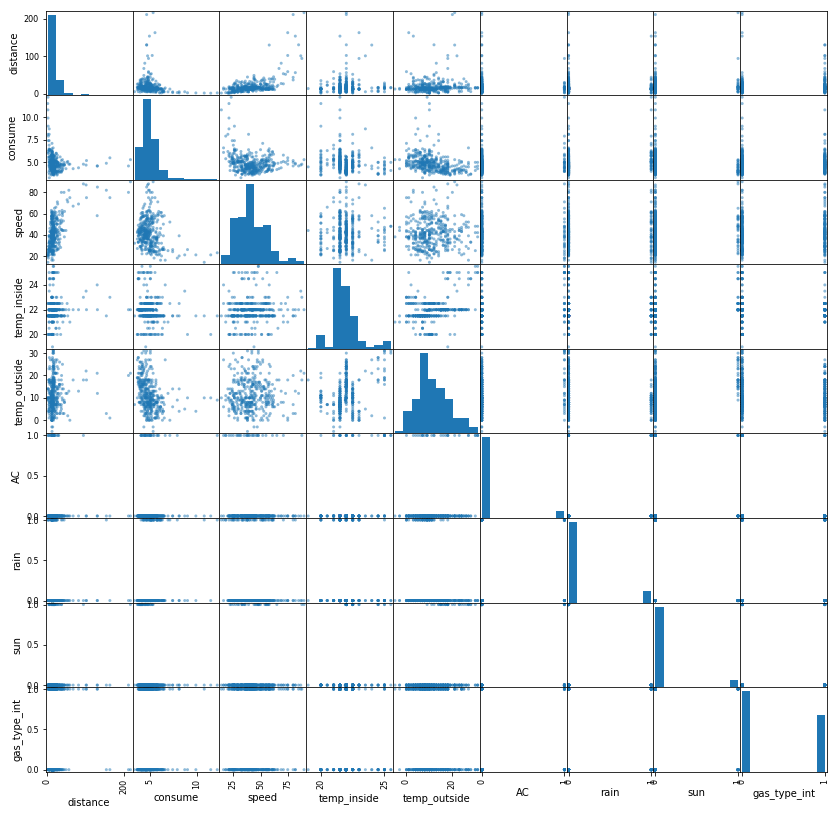

In [10]:
# 散布図行列を書いてみる
pd.plotting.scatter_matrix(df_car_consume, figsize=(14,14))
plt.show()

In [11]:
# 相関係数を確認
df_car_consume.corr()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,gas_type_int
distance,1.000000,-0.128967,0.562299,0.075178,0.088175,-0.025738,-0.019791,0.081120,0.053411
consume,-0.128967,1.000000,-0.227866,-0.160623,-0.320811,0.096591,0.248118,-0.170667,0.015327
speed,0.562299,-0.227866,1.000000,0.059293,0.015411,-0.035408,0.009489,0.081618,0.097360
temp_inside,0.075178,-0.160623,0.059293,1.000000,0.359500,0.297376,-0.036937,0.242248,-0.010198
temp_outside,0.088175,-0.320811,0.015411,0.359500,1.000000,0.167562,-0.186315,0.346903,-0.148705
AC,-0.025738,0.096591,-0.035408,0.297376,0.167562,1.000000,0.242915,0.088598,-0.105285
rain,-0.019791,0.248118,0.009489,-0.036937,-0.186315,0.242915,1.000000,-0.112650,-0.060328
sun,0.081120,-0.170667,0.081618,0.242248,0.346903,0.088598,-0.112650,1.000000,-0.022761
gas_type_int,0.053411,0.015327,0.097360,-0.010198,-0.148705,-0.105285,-0.060328,-0.022761,1.000000


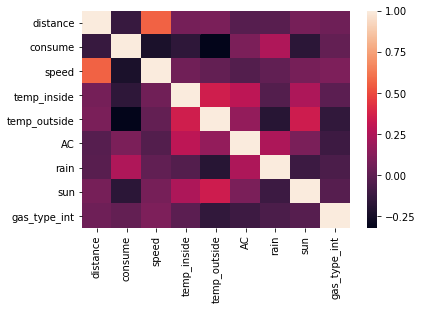

In [12]:
# 相関係数をヒートマップにして可視化
sns.heatmap(df_car_consume.corr())
plt.show()

相関を見る限り、燃費である目的変数「consume」に関係していると考えられる
説明変数は次の通り。

speed>>>-0.23

temp_outside>>>-0.32

rain>>>0.25

この３つのデータで予測してみたい。

ホールドアウト法で検証する。

学習前に、学習用データとテストデータに分けてみる。

In [13]:
from sklearn.model_selection import train_test_split
X, y = df_car_consume[["temp_outside", "speed", "rain"]].values, df_car_consume["consume"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

#とりあえず、テストサイズは５０％にした
display(X_train)
display(X_test)
display(y_train)
display(y_test)

array([[17, 49,  0],
       [ 7, 32,  0],
       [12, 27,  0],
       [-3, 44,  0],
       [10, 43,  0],
       [ 7, 25,  0],
       [ 5, 49,  0],
       [ 8, 42,  0],
       [17, 29,  0],
       [28, 33,  0],
       [ 8, 39,  0],
       [10, 40,  0],
       [ 4, 28,  0],
       [ 3, 38,  1],
       [ 4, 32,  0],
       [10, 20,  0],
       [14, 46,  0],
       [17, 43,  0],
       [27, 16,  0],
       [ 9, 32,  0],
       [ 4, 39,  0],
       [11, 18,  1],
       [ 7, 38,  0],
       [10, 57,  0],
       [12, 85,  0],
       [19, 45,  0],
       [ 1, 38,  1],
       [ 8, 38,  0],
       [13, 69,  0],
       [19, 36,  0],
       [23, 39,  0],
       [ 7, 37,  0],
       [ 5, 52,  0],
       [ 9, 34,  1],
       [ 7, 61,  1],
       [ 3, 36,  0],
       [ 7, 45,  0],
       [ 7, 38,  0],
       [ 7, 56,  0],
       [15, 53,  0],
       [12, 31,  0],
       [19, 32,  0],
       [ 7, 24,  1],
       [28, 33,  0],
       [15, 46,  0],
       [11, 57,  0],
       [11, 46,  0],
       [ 9, 2

array([[ 8, 28,  0],
       [ 0, 38,  1],
       [13, 24,  0],
       [ 3, 44,  0],
       [ 8, 40,  0],
       [ 8, 33,  0],
       [18, 32,  0],
       [16, 43,  0],
       [ 9, 34,  0],
       [14, 63,  0],
       [17, 49,  0],
       [ 6, 26,  0],
       [ 3, 55,  0],
       [26, 49,  0],
       [11, 37,  1],
       [ 8, 52,  1],
       [ 8, 40,  0],
       [ 8, 36,  0],
       [14, 20,  0],
       [ 7, 61,  0],
       [26, 29,  0],
       [27, 47,  0],
       [17, 56,  0],
       [ 6, 39,  0],
       [22, 36,  0],
       [ 9, 60,  1],
       [ 8, 33,  0],
       [ 2, 71,  0],
       [13, 42,  0],
       [13, 32,  0],
       [17, 46,  0],
       [24, 43,  0],
       [23, 23,  0],
       [18, 26,  0],
       [11, 43,  0],
       [13, 30,  0],
       [25, 50,  0],
       [21, 33,  0],
       [ 8, 69,  0],
       [10, 45,  0],
       [ 9, 62,  1],
       [ 9, 18,  1],
       [ 8, 42,  0],
       [ 4, 42,  0],
       [ 2, 21,  0],
       [ 4, 21,  0],
       [ 8, 57,  0],
       [13, 5

array([ 3.7,  3.3,  4. ,  4.3,  4.7,  5.4,  4.8,  3.8,  5.6,  3.7,  4.9,
        4.1,  4. ,  5.7,  6.2,  6.2,  3.9,  3.9,  6.6,  5. ,  8.1,  5.4,
        4.8,  5.2,  4.6,  3.8,  4.6,  4.6,  4.4,  3.6,  4.3,  5.7,  4.8,
        4.2,  4.6,  5.6,  5. ,  5.4,  5.1,  4.9,  4.7,  4.5,  5.4,  3.7,
        4.5,  4.2,  4.7, 12.2,  5. ,  5.4,  4.3,  4.1,  4.3,  4.1,  4.2,
        4.7,  4.1,  4. ,  8.7,  5.1,  6.5,  4.6,  4.1,  3.9,  6.3,  5.1,
        5.1,  4.9,  5. ,  4.6,  5.2,  5.1,  5.4,  6. ,  4.6,  4.1,  4.3,
        4. ,  5.2,  3.6,  4.2,  5. ,  3.8,  5.1,  3.7,  5.3,  3.9,  3.6,
        5.6,  5.2,  5.8,  4.6,  5.7,  4.8,  4.7,  4.3,  5. ,  3.8,  5.1,
        5.7,  3.7,  4.8,  5. ,  5.9,  5. ,  5.3,  4.1,  4.8,  4.5,  4.9,
        6.3,  4.5,  5.1,  4.7,  5.2,  4.9,  6.4,  4. ,  4.6,  4.5,  4.1,
        4.9,  5.8,  4.9,  4.3,  5.8,  3.6,  4. ,  5.8,  5.6,  6.2,  4.2,
        4.7,  3.8,  4.6,  5.3,  4.8,  3.8,  4.8,  6.1,  4.2,  5.6,  4.1,
        5.5,  4.7,  4.4,  5. ,  5.9,  4.5,  5. ,  5

array([ 6.4,  4.6,  5.4,  4.4,  3.8,  4.7,  4.5,  4.6,  4.1,  4.8,  4.3,
        7.4,  4.6,  4.1,  5.7,  5.7,  4.3,  4.6,  8.1,  4.2,  3.9,  4.8,
        4. ,  4.5,  4.3,  5.3,  4.4,  5.1,  4.5,  4.1,  4.1,  4.1,  5.2,
        4.7,  4.4,  4.2,  4.6,  4.1,  5. ,  4.5,  5. ,  7.9,  3.9,  5.6,
        5.7,  9.9,  4.7,  5.4,  4.4,  4.6,  4.1,  5.1,  9. ,  5.2,  6.4,
        5. ,  4.1,  5. ,  5. ,  4.6,  4.5,  4.5,  4.6,  4.2,  5.5,  4.8,
        4.6,  3.9,  4.7,  5.1,  5. ,  5.4,  4.9,  4.3, 11.5,  5.5,  5. ,
        4.3,  3.9,  4.9,  6.4,  4.3,  6. ,  4. ,  4.2,  4.2,  4.8,  5.3,
        4.8,  4.3,  4.9,  4.5,  4.5,  4.5,  5. ,  5.6,  6.1,  5.9,  3.9,
        7.1,  4.9,  4.7,  4.4,  4.5,  4. ,  4.7,  4.5,  5.5,  4.4,  4. ,
        5.7,  5. ,  4.9,  5. ,  5.2,  5.3,  5.2,  4.6,  4.4,  5. ,  5.9,
        5.8,  4.4,  4.5,  5.2,  7.4,  5.1,  5.3,  4. ,  5. ,  5.3,  4.7,
        4.3,  6.9,  4.8,  5.1,  4.9,  5.1,  5.3,  5.1,  4.7,  4.5,  4.5,
        6. ,  5.6,  5.5,  3.8,  4.2,  5.2,  4.5,  4

上記テスト用の説明変数から目的変数を求めてみたい。

In [14]:
#consumeと説明変数3つとの線形回帰
# 係数を求める
regr = LinearRegression(fit_intercept=True)
regr.fit(X_train, y_train)

# 重みを取り出す
w0 = regr.intercept_
w1 = regr.coef_[0]
w2 = regr.coef_[1]
w3 = regr.coef_[2]

# 重みと二乗誤差の確認
# 学習用データに対する予測を実行
y_pred_train = regr.predict(X_train)
squared_error = 0.5 * np.sum((y_train - y_pred_train) ** 2)
print('w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}, w3 = {:.3f}'.format(w0, w1, w2, w3))
print('二乗誤差 = {:.3f}'.format(squared_error))

from sklearn.metrics import mean_squared_error, mean_absolute_error # 回帰問題における性能評価に関する関数

# MSEを計算
mse = mean_squared_error(y_train, y_pred_train) 
print("MSE = %s"%round(mse, 3) )  

# MAEを計算
mae = mean_absolute_error(y_train, y_pred_train) 
print("MAE = %s"%round(mae, 3) )

# RMSEを計算
rmse = np.sqrt(mse)
print("RMSE = %s"%round(rmse, 3) )

w0 = 6.035, w1 = -0.048, w2 = -0.017, w3 = 0.682
二乗誤差 = 84.900
MSE = 0.875
MAE = 0.631
RMSE = 0.936


次はテストデータで実施する。

In [15]:
# テストデータに対する予測を実行
y_pred_test = regr.predict(X_test)
squared_error_test = 0.5 * np.sum((y_test - y_pred_test) ** 2)
print('二乗誤差 = {:.3f}'.format(squared_error_test))

from sklearn.metrics import mean_squared_error, mean_absolute_error # 回帰問題における性能評価に関する関数

# MSEを計算
mse = mean_squared_error(y_test, y_pred_test) 
print("MSE = %s"%round(mse, 3) )  

# MAEを計算
mae = mean_absolute_error(y_test, y_pred_test) 
print("MAE = %s"%round(mae, 3) )

# RMSEを計算
rmse = np.sqrt(mse)
print("RMSE = %s"%round(rmse, 3) )

二乗誤差 = 83.004
MSE = 0.856
MAE = 0.6
RMSE = 0.925


day1（前回）の結果は次の通りです。

二乗誤差が167.210
MSEが0.862
MAEが0.619
RMSEが0.928

比較すると若干良くなっている気がします。

次は、説明変数を標準化してから計算してみる。

データを標準化して、それでモデルを作って、ホールドアウトで検証する。

In [16]:
# 標準化操作
from sklearn.preprocessing import StandardScaler#インポート

stdsc = StandardScaler()
X_train_stand = stdsc.fit_transform(X_train)
X_test_stand  = stdsc.transform(X_test)#fitは上のを引き継ぐ

display(X_train_stand)
display(X_test_stand)
display(y_train)
display(y_test)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.81721033,  0.59379233, -0.3667464 ],
       [-0.6493836 , -0.67702344, -0.3667464 ],
       [ 0.08391336, -1.05079278, -0.3667464 ],
       [-2.11597752,  0.22002298, -0.3667464 ],
       [-0.20940542,  0.14526912, -0.3667464 ],
       [-0.6493836 , -1.20030052, -0.3667464 ],
       [-0.94270238,  0.59379233, -0.3667464 ],
       [-0.50272421,  0.07051525, -0.3667464 ],
       [ 0.81721033, -0.90128504, -0.3667464 ],
       [ 2.43046364, -0.60226957, -0.3667464 ],
       [-0.50272421, -0.15374636, -0.3667464 ],
       [-0.20940542, -0.07899249, -0.3667464 ],
       [-1.08936178, -0.97603891, -0.3667464 ],
       [-1.23602117, -0.22850023,  2.72667978],
       [-1.08936178, -0.67702344, -0.3667464 ],
       [-0.20940542, -1.57406986, -0.3667464 ],
       [ 0.37723215,  0.36953072, -0.3667464 ],
       [ 0.81721033,  0.14526912, -0.3667464 ],
       [ 2.28380425, -1.87308533, -0.3667464 ],
       [-0.35606481, -0.67702344, -0.3667464 ],
       [-1.08936178, -0.15374636, -0.366

array([[-0.50272421, -0.97603891, -0.3667464 ],
       [-1.67599935, -0.22850023,  2.72667978],
       [ 0.23057276, -1.27505438, -0.3667464 ],
       [-1.23602117,  0.22002298, -0.3667464 ],
       [-0.50272421, -0.07899249, -0.3667464 ],
       [-0.50272421, -0.60226957, -0.3667464 ],
       [ 0.96386972, -0.67702344, -0.3667464 ],
       [ 0.67055093,  0.14526912, -0.3667464 ],
       [-0.35606481, -0.5275157 , -0.3667464 ],
       [ 0.37723215,  1.64034648, -0.3667464 ],
       [ 0.81721033,  0.59379233, -0.3667464 ],
       [-0.79604299, -1.12554665, -0.3667464 ],
       [-1.23602117,  1.04231554, -0.3667464 ],
       [ 2.13714486,  0.59379233, -0.3667464 ],
       [-0.06274603, -0.30325409,  2.72667978],
       [-0.50272421,  0.81805393,  2.72667978],
       [-0.50272421, -0.07899249, -0.3667464 ],
       [-0.50272421, -0.37800796, -0.3667464 ],
       [ 0.37723215, -1.57406986, -0.3667464 ],
       [-0.6493836 ,  1.49083875, -0.3667464 ],
       [ 2.13714486, -0.90128504, -0.366

array([ 3.7,  3.3,  4. ,  4.3,  4.7,  5.4,  4.8,  3.8,  5.6,  3.7,  4.9,
        4.1,  4. ,  5.7,  6.2,  6.2,  3.9,  3.9,  6.6,  5. ,  8.1,  5.4,
        4.8,  5.2,  4.6,  3.8,  4.6,  4.6,  4.4,  3.6,  4.3,  5.7,  4.8,
        4.2,  4.6,  5.6,  5. ,  5.4,  5.1,  4.9,  4.7,  4.5,  5.4,  3.7,
        4.5,  4.2,  4.7, 12.2,  5. ,  5.4,  4.3,  4.1,  4.3,  4.1,  4.2,
        4.7,  4.1,  4. ,  8.7,  5.1,  6.5,  4.6,  4.1,  3.9,  6.3,  5.1,
        5.1,  4.9,  5. ,  4.6,  5.2,  5.1,  5.4,  6. ,  4.6,  4.1,  4.3,
        4. ,  5.2,  3.6,  4.2,  5. ,  3.8,  5.1,  3.7,  5.3,  3.9,  3.6,
        5.6,  5.2,  5.8,  4.6,  5.7,  4.8,  4.7,  4.3,  5. ,  3.8,  5.1,
        5.7,  3.7,  4.8,  5. ,  5.9,  5. ,  5.3,  4.1,  4.8,  4.5,  4.9,
        6.3,  4.5,  5.1,  4.7,  5.2,  4.9,  6.4,  4. ,  4.6,  4.5,  4.1,
        4.9,  5.8,  4.9,  4.3,  5.8,  3.6,  4. ,  5.8,  5.6,  6.2,  4.2,
        4.7,  3.8,  4.6,  5.3,  4.8,  3.8,  4.8,  6.1,  4.2,  5.6,  4.1,
        5.5,  4.7,  4.4,  5. ,  5.9,  4.5,  5. ,  5

array([ 6.4,  4.6,  5.4,  4.4,  3.8,  4.7,  4.5,  4.6,  4.1,  4.8,  4.3,
        7.4,  4.6,  4.1,  5.7,  5.7,  4.3,  4.6,  8.1,  4.2,  3.9,  4.8,
        4. ,  4.5,  4.3,  5.3,  4.4,  5.1,  4.5,  4.1,  4.1,  4.1,  5.2,
        4.7,  4.4,  4.2,  4.6,  4.1,  5. ,  4.5,  5. ,  7.9,  3.9,  5.6,
        5.7,  9.9,  4.7,  5.4,  4.4,  4.6,  4.1,  5.1,  9. ,  5.2,  6.4,
        5. ,  4.1,  5. ,  5. ,  4.6,  4.5,  4.5,  4.6,  4.2,  5.5,  4.8,
        4.6,  3.9,  4.7,  5.1,  5. ,  5.4,  4.9,  4.3, 11.5,  5.5,  5. ,
        4.3,  3.9,  4.9,  6.4,  4.3,  6. ,  4. ,  4.2,  4.2,  4.8,  5.3,
        4.8,  4.3,  4.9,  4.5,  4.5,  4.5,  5. ,  5.6,  6.1,  5.9,  3.9,
        7.1,  4.9,  4.7,  4.4,  4.5,  4. ,  4.7,  4.5,  5.5,  4.4,  4. ,
        5.7,  5. ,  4.9,  5. ,  5.2,  5.3,  5.2,  4.6,  4.4,  5. ,  5.9,
        5.8,  4.4,  4.5,  5.2,  7.4,  5.1,  5.3,  4. ,  5. ,  5.3,  4.7,
        4.3,  6.9,  4.8,  5.1,  4.9,  5.1,  5.3,  5.1,  4.7,  4.5,  4.5,
        6. ,  5.6,  5.5,  3.8,  4.2,  5.2,  4.5,  4

In [17]:
#consumeと説明変数3つとの線形回帰
# 係数を求める
regr = LinearRegression(fit_intercept=True)
regr.fit(X_train_stand, y_train)

# 重みを取り出す
w0 = regr.intercept_
w1 = regr.coef_[0]
w2 = regr.coef_[1]
w3 = regr.coef_[2]

# 重みと二乗誤差の確認
# 学習用データに対する予測を実行
y_pred_train = regr.predict(X_train_stand)
squared_error = 0.5 * np.sum((y_train - y_pred_train) ** 2)
print('w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}, w3 = {:.3f}'.format(w0, w1, w2, w3))
print('学習データの二乗誤差 = {:.3f}'.format(squared_error))

from sklearn.metrics import mean_squared_error, mean_absolute_error # 回帰問題における性能評価に関する関数

# MSEを計算
mse = mean_squared_error(y_train, y_pred_train) 
print("MSE = %s"%round(mse, 3) )  

# MAEを計算
mae = mean_absolute_error(y_train, y_pred_train) 
print("MAE = %s"%round(mae, 3) )

# RMSEを計算
rmse = np.sqrt(mse)
print("RMSE = %s"%round(rmse, 3) )

# テストデータに対する予測を実行
y_pred_test = regr.predict(X_test_stand)
squared_error_test = 0.5 * np.sum((y_test - y_pred_test) ** 2)
print('テストデータの二乗誤差 = {:.3f}'.format(squared_error_test))

from sklearn.metrics import mean_squared_error, mean_absolute_error # 回帰問題における性能評価に関する関数

# MSEを計算
mse = mean_squared_error(y_test, y_pred_test) 
print("MSE = %s"%round(mse, 3) )  

# MAEを計算
mae = mean_absolute_error(y_test, y_pred_test) 
print("MAE = %s"%round(mae, 3) )

# RMSEを計算
rmse = np.sqrt(mse)
print("RMSE = %s"%round(rmse, 3) )

w0 = 4.890, w1 = -0.325, w2 = -0.222, w3 = 0.220
学習データの二乗誤差 = 84.900
MSE = 0.875
MAE = 0.631
RMSE = 0.936
テストデータの二乗誤差 = 83.004
MSE = 0.856
MAE = 0.6
RMSE = 0.925


標準化する前と、した後で結果は同じであった。

In [18]:
from sklearn.linear_model import Ridge,Lasso #正則化項付き最小二乗法を行うためのライブラリ

次は正則化で過学習の影響を抑制する。（過学習にはなっていない気がするが）まずL2正則化を考えてみる。

In [19]:
for i in range(26):
    alp = i * 2
    #consumeと説明変数3つとの線形回帰
    # 係数を求める
    print("☆λ = {}のとき☆".format(alp))
    l2regr = Ridge(alpha = alp)
    l2regr.fit(X_train_stand, y_train)

    # 重みを取り出す
    w0 = l2regr.intercept_
    w1 = l2regr.coef_[0]
    w2 = l2regr.coef_[1]
    w3 = l2regr.coef_[2]

    # 重みと二乗誤差の確認
    # 学習用データに対する予測を実行
    y_pred_train = l2regr.predict(X_train_stand)
    squared_error = 0.5 * np.sum((y_train - y_pred_train) ** 2)
    print('w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}, w3 = {:.3f}'.format(w0, w1, w2, w3))
    print('学習時の二乗誤差 = {:.3f}'.format(squared_error))

    from sklearn.metrics import mean_squared_error, mean_absolute_error # 回帰問題における性能評価に関する関数

    # MSEを計算
    mse = mean_squared_error(y_train, y_pred_train) 
    print("MSE = %s"%round(mse, 3) )  

    # MAEを計算
    mae = mean_absolute_error(y_train, y_pred_train) 
    print("MAE = %s"%round(mae, 3) )

    # RMSEを計算
    rmse = np.sqrt(mse)
    print("RMSE = %s"%round(rmse, 3) )

    # テストデータに対する予測を実行
    y_pred_test = l2regr.predict(X_test_stand)
    squared_error_test = 0.5 * np.sum((y_test - y_pred_test) ** 2)
    print('テスト時の二乗誤差 = {:.3f}'.format(squared_error_test))
    
    # MSEを計算
    mse = mean_squared_error(y_test, y_pred_test) 
    print("MSE = %s"%round(mse, 3) )  

    # MAEを計算
    mae = mean_absolute_error(y_test, y_pred_test) 
    print("MAE = %s"%round(mae, 3) )

    # RMSEを計算
    rmse = np.sqrt(mse)
    print("RMSE = %s"%round(rmse, 3) )
    print()

☆λ = 0のとき☆
w0 = 4.890, w1 = -0.325, w2 = -0.222, w3 = 0.220
学習時の二乗誤差 = 84.900
MSE = 0.875
MAE = 0.631
RMSE = 0.936
テスト時の二乗誤差 = 83.004
MSE = 0.856
MAE = 0.6
RMSE = 0.925

☆λ = 2のとき☆
w0 = 4.890, w1 = -0.322, w2 = -0.219, w3 = 0.219
学習時の二乗誤差 = 84.901
MSE = 0.875
MAE = 0.63
RMSE = 0.936
テスト時の二乗誤差 = 82.935
MSE = 0.855
MAE = 0.599
RMSE = 0.925

☆λ = 4のとき☆
w0 = 4.890, w1 = -0.319, w2 = -0.217, w3 = 0.217
学習時の二乗誤差 = 84.907
MSE = 0.875
MAE = 0.63
RMSE = 0.936
テスト時の二乗誤差 = 82.870
MSE = 0.854
MAE = 0.598
RMSE = 0.924

☆λ = 6のとき☆
w0 = 4.890, w1 = -0.316, w2 = -0.215, w3 = 0.216
学習時の二乗誤差 = 84.916
MSE = 0.875
MAE = 0.629
RMSE = 0.936
テスト時の二乗誤差 = 82.811
MSE = 0.854
MAE = 0.597
RMSE = 0.924

☆λ = 8のとき☆
w0 = 4.890, w1 = -0.313, w2 = -0.212, w3 = 0.214
学習時の二乗誤差 = 84.928
MSE = 0.876
MAE = 0.629
RMSE = 0.936
テスト時の二乗誤差 = 82.758
MSE = 0.853
MAE = 0.596
RMSE = 0.924

☆λ = 10のとき☆
w0 = 4.890, w1 = -0.310, w2 = -0.210, w3 = 0.213
学習時の二乗誤差 = 84.943
MSE = 0.876
MAE = 0.629
RMSE = 0.936
テスト時の二乗誤差 = 82.708
MSE = 0.8

L2正則化では汎化性能が劇的に良くなることはなかった。
試してみた値ではλ＝38くらいの値が最小値になった。

次はL1正則化をしてみる。

In [20]:
for i in range(100):
    alp = i / 100
    #consumeと説明変数3つとの線形回帰
    # 係数を求める
    print("☆λ = {:.2f}のとき☆".format(alp))
    l1regr = Lasso(alpha = alp)
    l1regr.fit(X_train_stand, y_train)

    # 重みを取り出す
    w0 = l1regr.intercept_
    w1 = l1regr.coef_[0]
    w2 = l1regr.coef_[1]
    w3 = l1regr.coef_[2]

    # 重みと二乗誤差の確認
    # 学習用データに対する予測を実行
    y_pred_train = l1regr.predict(X_train_stand)
    squared_error = 0.5 * np.sum((y_train - y_pred_train) ** 2)
    print('w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}, w3 = {:.3f}'.format(w0, w1, w2, w3))
    print('学習時の二乗誤差 = {:.3f}'.format(squared_error))

    from sklearn.metrics import mean_squared_error, mean_absolute_error # 回帰問題における性能評価に関する関数

    # MSEを計算
    mse = mean_squared_error(y_train, y_pred_train) 
    print("MSE = %s"%round(mse, 3) )  

    # MAEを計算
    mae = mean_absolute_error(y_train, y_pred_train) 
    print("MAE = %s"%round(mae, 3) )

    # RMSEを計算
    rmse = np.sqrt(mse)
    print("RMSE = %s"%round(rmse, 3) )

    # テストデータに対する予測を実行
    y_pred_test = l1regr.predict(X_test_stand)
    squared_error_test = 0.5 * np.sum((y_test - y_pred_test) ** 2)
    print('テスト時の二乗誤差 = {:.3f}'.format(squared_error_test))
    
    # MSEを計算
    mse = mean_squared_error(y_test, y_pred_test)
    print("MSE = %s"%round(mse, 3) )  

    # MAEを計算
    mae = mean_absolute_error(y_test, y_pred_test) 
    print("MAE = %s"%round(mae, 3) )

    # RMSEを計算
    rmse = np.sqrt(mse)
    print("RMSE = %s"%round(rmse, 3) )
    print()

☆λ = 0.00のとき☆
w0 = 4.890, w1 = -0.325, w2 = -0.222, w3 = 0.220
学習時の二乗誤差 = 84.900
MSE = 0.875
MAE = 0.631
RMSE = 0.936
テスト時の二乗誤差 = 83.004
MSE = 0.856
MAE = 0.6
RMSE = 0.925

☆λ = 0.01のとき☆
w0 = 4.890, w1 = -0.316, w2 = -0.212, w3 = 0.213
学習時の二乗誤差 = 84.926
MSE = 0.876
MAE = 0.629
RMSE = 0.936
テスト時の二乗誤差 = 82.796
MSE = 0.854
MAE = 0.597
RMSE = 0.924

☆λ = 0.02のとき☆
w0 = 4.890, w1 = -0.307, w2 = -0.201, w3 = 0.205
学習時の二乗誤差 = 85.005
MSE = 0.876
MAE = 0.627
RMSE = 0.936
テスト時の二乗誤差 = 82.646
MSE = 0.852
MAE = 0.594
RMSE = 0.923

☆λ = 0.03のとき☆
w0 = 4.890, w1 = -0.297, w2 = -0.191, w3 = 0.197
学習時の二乗誤差 = 85.136
MSE = 0.878
MAE = 0.625
RMSE = 0.937
テスト時の二乗誤差 = 82.556
MSE = 0.851
MAE = 0.592
RMSE = 0.923

☆λ = 0.04のとき☆
w0 = 4.890, w1 = -0.288, w2 = -0.181, w3 = 0.189
学習時の二乗誤差 = 85.320
MSE = 0.88
MAE = 0.624
RMSE = 0.938
テスト時の二乗誤差 = 82.524
MSE = 0.851
MAE = 0.589
RMSE = 0.922

☆λ = 0.05のとき☆
w0 = 4.890, w1 = -0.279, w2 = -0.171, w3 = 0.182
学習時の二乗誤差 = 85.557
MSE = 0.882
MAE = 0.623
RMSE = 0.939
テスト時の二乗誤差 

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)



☆λ = 0.67のとき☆
w0 = 4.890, w1 = -0.000, w2 = -0.000, w3 = 0.000
学習時の二乗誤差 = 106.786
MSE = 1.101
MAE = 0.684
RMSE = 1.049
テスト時の二乗誤差 = 99.860
MSE = 1.029
MAE = 0.661
RMSE = 1.015

☆λ = 0.68のとき☆
w0 = 4.890, w1 = -0.000, w2 = -0.000, w3 = 0.000
学習時の二乗誤差 = 106.786
MSE = 1.101
MAE = 0.684
RMSE = 1.049
テスト時の二乗誤差 = 99.860
MSE = 1.029
MAE = 0.661
RMSE = 1.015

☆λ = 0.69のとき☆
w0 = 4.890, w1 = -0.000, w2 = -0.000, w3 = 0.000
学習時の二乗誤差 = 106.786
MSE = 1.101
MAE = 0.684
RMSE = 1.049
テスト時の二乗誤差 = 99.860
MSE = 1.029
MAE = 0.661
RMSE = 1.015

☆λ = 0.70のとき☆
w0 = 4.890, w1 = -0.000, w2 = -0.000, w3 = 0.000
学習時の二乗誤差 = 106.786
MSE = 1.101
MAE = 0.684
RMSE = 1.049
テスト時の二乗誤差 = 99.860
MSE = 1.029
MAE = 0.661
RMSE = 1.015

☆λ = 0.71のとき☆
w0 = 4.890, w1 = -0.000, w2 = -0.000, w3 = 0.000
学習時の二乗誤差 = 106.786
MSE = 1.101
MAE = 0.684
RMSE = 1.049
テスト時の二乗誤差 = 99.860
MSE = 1.029
MAE = 0.661
RMSE = 1.015

☆λ = 0.72のとき☆
w0 = 4.890, w1 = -0.000, w2 = -0.000, w3 = 0.000
学習時の二乗誤差 = 106.786
MSE = 1.101
MAE = 0.684
RMSE = 1.049


L1正則化では汎化性能は上昇する事があまり見込まれないと分かった。

正則化を使用するなら、L2正則化が良いと考えます。

In [21]:
#consumeと説明変数3つとの線形回帰
# 係数を求める
print("☆λ = 38のとき☆")
l2regr = Ridge(alpha = 38)
l2regr.fit(X_train_stand, y_train)

# 重みを取り出す
w0 = l2regr.intercept_
w1 = l2regr.coef_[0]
w2 = l2regr.coef_[1]
w3 = l2regr.coef_[2]

# 重みと二乗誤差の確認
# 学習用データに対する予測を実行
y_pred_train = l2regr.predict(X_train_stand)
squared_error = 0.5 * np.sum((y_train - y_pred_train) ** 2)
print('w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}, w3 = {:.3f}'.format(w0, w1, w2, w3))
print('学習時の二乗誤差 = {:.3f}'.format(squared_error))

from sklearn.metrics import mean_squared_error, mean_absolute_error # 回帰問題における性能評価に関する関数

# MSEを計算
mse = mean_squared_error(y_train, y_pred_train) 
print("MSE = %s"%round(mse, 3) )  

# MAEを計算
mae = mean_absolute_error(y_train, y_pred_train) 
print("MAE = %s"%round(mae, 3) )

# RMSEを計算
rmse = np.sqrt(mse)
print("RMSE = %s"%round(rmse, 3) )

# テストデータに対する予測を実行
y_pred_test = l2regr.predict(X_test_stand)
squared_error_test = 0.5 * np.sum((y_test - y_pred_test) ** 2)
print('テスト時の二乗誤差 = {:.3f}'.format(squared_error_test))

# MSEを計算
mse = mean_squared_error(y_test, y_pred_test) 
print("MSE = %s"%round(mse, 3) )  

# MAEを計算
mae = mean_absolute_error(y_test, y_pred_test) 
print("MAE = %s"%round(mae, 3) )

# RMSEを計算
rmse = np.sqrt(mse)
print("RMSE = %s"%round(rmse, 3) )

☆λ = 38のとき☆
w0 = 4.890, w1 = -0.274, w2 = -0.184, w3 = 0.194
学習時の二乗誤差 = 85.396
MSE = 0.88
MAE = 0.625
RMSE = 0.938
テスト時の二乗誤差 = 82.405
MSE = 0.85
MAE = 0.588
RMSE = 0.922


今回（テストデータによるモデルの結果）と、day1（前回）の結果を比較すると次の通り。

二乗誤差：167.210　＞＞＞　82.405

MSEが0.862　＞＞＞　0.85

MAEが0.619　＞＞＞　0.588

RMSEが0.928　＞＞＞　0.922


今回やった事

・モデルの検証・・・ホールドアウト法（学習：テスト＝50：50）

・正則化・・・L2正則化（リッジ）、λ＝38

・見たところ、過学習はしていないと考えられる

次に、説明変数を増加すると有効であるかどうかの確認と、交差検証するとホールドアウト法を使用した時と比べて
MAEの値が違うか確認する。

まず、説明変数を5つに増やしてみて確認する。
今まで使用した説明変数に加えて、相関係数が高かった「sun」と「temp_inside」を追加する。

「sun」の相関係数＞＞＞-0.17

「temp_inside」の相関係数＞＞＞-0.16

In [22]:
X, y = df_car_consume[["temp_outside", "speed", "rain", "sun", "temp_inside"]].values, df_car_consume["consume"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

#テストサイズは５０％にした
display(X_train)
display(X_test)
display(y_train)
display(y_test)

array([[17.        , 49.        ,  0.        ,  0.        , 22.        ],
       [ 7.        , 32.        ,  0.        ,  0.        , 21.5       ],
       [12.        , 27.        ,  0.        ,  0.        , 22.5       ],
       [-3.        , 44.        ,  0.        ,  0.        , 21.5       ],
       [10.        , 43.        ,  0.        ,  0.        , 21.92952128],
       [ 7.        , 25.        ,  0.        ,  0.        , 21.        ],
       [ 5.        , 49.        ,  0.        ,  0.        , 21.5       ],
       [ 8.        , 42.        ,  0.        ,  0.        , 21.92952128],
       [17.        , 29.        ,  0.        ,  0.        , 22.        ],
       [28.        , 33.        ,  0.        ,  1.        , 24.5       ],
       [ 8.        , 39.        ,  0.        ,  0.        , 21.5       ],
       [10.        , 40.        ,  0.        ,  0.        , 22.        ],
       [ 4.        , 28.        ,  0.        ,  0.        , 20.        ],
       [ 3.        , 38.        ,  1. 

array([[ 8.        , 28.        ,  0.        ,  0.        , 21.5       ],
       [ 0.        , 38.        ,  1.        ,  0.        , 23.        ],
       [13.        , 24.        ,  0.        ,  0.        , 22.5       ],
       [ 3.        , 44.        ,  0.        ,  0.        , 21.        ],
       [ 8.        , 40.        ,  0.        ,  0.        , 22.        ],
       [ 8.        , 33.        ,  0.        ,  0.        , 20.        ],
       [18.        , 32.        ,  0.        ,  0.        , 22.        ],
       [16.        , 43.        ,  0.        ,  0.        , 22.        ],
       [ 9.        , 34.        ,  0.        ,  0.        , 21.92952128],
       [14.        , 63.        ,  0.        ,  0.        , 21.5       ],
       [17.        , 49.        ,  0.        ,  0.        , 21.5       ],
       [ 6.        , 26.        ,  0.        ,  0.        , 21.5       ],
       [ 3.        , 55.        ,  0.        ,  0.        , 23.        ],
       [26.        , 49.        ,  0. 

array([ 3.7,  3.3,  4. ,  4.3,  4.7,  5.4,  4.8,  3.8,  5.6,  3.7,  4.9,
        4.1,  4. ,  5.7,  6.2,  6.2,  3.9,  3.9,  6.6,  5. ,  8.1,  5.4,
        4.8,  5.2,  4.6,  3.8,  4.6,  4.6,  4.4,  3.6,  4.3,  5.7,  4.8,
        4.2,  4.6,  5.6,  5. ,  5.4,  5.1,  4.9,  4.7,  4.5,  5.4,  3.7,
        4.5,  4.2,  4.7, 12.2,  5. ,  5.4,  4.3,  4.1,  4.3,  4.1,  4.2,
        4.7,  4.1,  4. ,  8.7,  5.1,  6.5,  4.6,  4.1,  3.9,  6.3,  5.1,
        5.1,  4.9,  5. ,  4.6,  5.2,  5.1,  5.4,  6. ,  4.6,  4.1,  4.3,
        4. ,  5.2,  3.6,  4.2,  5. ,  3.8,  5.1,  3.7,  5.3,  3.9,  3.6,
        5.6,  5.2,  5.8,  4.6,  5.7,  4.8,  4.7,  4.3,  5. ,  3.8,  5.1,
        5.7,  3.7,  4.8,  5. ,  5.9,  5. ,  5.3,  4.1,  4.8,  4.5,  4.9,
        6.3,  4.5,  5.1,  4.7,  5.2,  4.9,  6.4,  4. ,  4.6,  4.5,  4.1,
        4.9,  5.8,  4.9,  4.3,  5.8,  3.6,  4. ,  5.8,  5.6,  6.2,  4.2,
        4.7,  3.8,  4.6,  5.3,  4.8,  3.8,  4.8,  6.1,  4.2,  5.6,  4.1,
        5.5,  4.7,  4.4,  5. ,  5.9,  4.5,  5. ,  5

array([ 6.4,  4.6,  5.4,  4.4,  3.8,  4.7,  4.5,  4.6,  4.1,  4.8,  4.3,
        7.4,  4.6,  4.1,  5.7,  5.7,  4.3,  4.6,  8.1,  4.2,  3.9,  4.8,
        4. ,  4.5,  4.3,  5.3,  4.4,  5.1,  4.5,  4.1,  4.1,  4.1,  5.2,
        4.7,  4.4,  4.2,  4.6,  4.1,  5. ,  4.5,  5. ,  7.9,  3.9,  5.6,
        5.7,  9.9,  4.7,  5.4,  4.4,  4.6,  4.1,  5.1,  9. ,  5.2,  6.4,
        5. ,  4.1,  5. ,  5. ,  4.6,  4.5,  4.5,  4.6,  4.2,  5.5,  4.8,
        4.6,  3.9,  4.7,  5.1,  5. ,  5.4,  4.9,  4.3, 11.5,  5.5,  5. ,
        4.3,  3.9,  4.9,  6.4,  4.3,  6. ,  4. ,  4.2,  4.2,  4.8,  5.3,
        4.8,  4.3,  4.9,  4.5,  4.5,  4.5,  5. ,  5.6,  6.1,  5.9,  3.9,
        7.1,  4.9,  4.7,  4.4,  4.5,  4. ,  4.7,  4.5,  5.5,  4.4,  4. ,
        5.7,  5. ,  4.9,  5. ,  5.2,  5.3,  5.2,  4.6,  4.4,  5. ,  5.9,
        5.8,  4.4,  4.5,  5.2,  7.4,  5.1,  5.3,  4. ,  5. ,  5.3,  4.7,
        4.3,  6.9,  4.8,  5.1,  4.9,  5.1,  5.3,  5.1,  4.7,  4.5,  4.5,
        6. ,  5.6,  5.5,  3.8,  4.2,  5.2,  4.5,  4

In [23]:
stdsc = StandardScaler()
X_train_stand = stdsc.fit_transform(X_train)
X_test_stand  = stdsc.transform(X_test)#fitは上のを引き継ぐ

display(X_train_stand)
display(X_test_stand)

array([[ 0.81721033,  0.59379233, -0.3667464 , -0.2567763 ,  0.07959401],
       [-0.6493836 , -0.67702344, -0.3667464 , -0.2567763 , -0.40102728],
       [ 0.08391336, -1.05079278, -0.3667464 , -0.2567763 ,  0.56021529],
       [-2.11597752,  0.22002298, -0.3667464 , -0.2567763 , -0.40102728],
       [-0.20940542,  0.14526912, -0.3667464 , -0.2567763 ,  0.01184686],
       [-0.6493836 , -1.20030052, -0.3667464 , -0.2567763 , -0.88164856],
       [-0.94270238,  0.59379233, -0.3667464 , -0.2567763 , -0.40102728],
       [-0.50272421,  0.07051525, -0.3667464 , -0.2567763 ,  0.01184686],
       [ 0.81721033, -0.90128504, -0.3667464 , -0.2567763 ,  0.07959401],
       [ 2.43046364, -0.60226957, -0.3667464 ,  3.89444048,  2.48270043],
       [-0.50272421, -0.15374636, -0.3667464 , -0.2567763 , -0.40102728],
       [-0.20940542, -0.07899249, -0.3667464 , -0.2567763 ,  0.07959401],
       [-1.08936178, -0.97603891, -0.3667464 , -0.2567763 , -1.84289113],
       [-1.23602117, -0.22850023,  2.7

array([[-0.50272421, -0.97603891, -0.3667464 , -0.2567763 , -0.40102728],
       [-1.67599935, -0.22850023,  2.72667978, -0.2567763 ,  1.04083658],
       [ 0.23057276, -1.27505438, -0.3667464 , -0.2567763 ,  0.56021529],
       [-1.23602117,  0.22002298, -0.3667464 , -0.2567763 , -0.88164856],
       [-0.50272421, -0.07899249, -0.3667464 , -0.2567763 ,  0.07959401],
       [-0.50272421, -0.60226957, -0.3667464 , -0.2567763 , -1.84289113],
       [ 0.96386972, -0.67702344, -0.3667464 , -0.2567763 ,  0.07959401],
       [ 0.67055093,  0.14526912, -0.3667464 , -0.2567763 ,  0.07959401],
       [-0.35606481, -0.5275157 , -0.3667464 , -0.2567763 ,  0.01184686],
       [ 0.37723215,  1.64034648, -0.3667464 , -0.2567763 , -0.40102728],
       [ 0.81721033,  0.59379233, -0.3667464 , -0.2567763 , -0.40102728],
       [-0.79604299, -1.12554665, -0.3667464 , -0.2567763 , -0.40102728],
       [-1.23602117,  1.04231554, -0.3667464 , -0.2567763 ,  1.04083658],
       [ 2.13714486,  0.59379233, -0.3

In [24]:
for i in range(26):
    alp = i * 2
    #consumeと説明変数3つとの線形回帰
    # 係数を求める
    print("☆λ = {}のとき☆".format(alp))
    l2regr = Ridge(alpha = alp)
    l2regr.fit(X_train_stand, y_train)

    # 重みを取り出す
    w0 = l2regr.intercept_
    w1 = l2regr.coef_[0]
    w2 = l2regr.coef_[1]
    w3 = l2regr.coef_[2]
    w4 = l2regr.coef_[3]
    w5 = l2regr.coef_[4]

    # 重みと二乗誤差の確認
    # 学習用データに対する予測を実行
    y_pred_train = l2regr.predict(X_train_stand)
    squared_error = 0.5 * np.sum((y_train - y_pred_train) ** 2)
    print('w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}, w3 = {:.3f}, w4 = {:.3f}, w5 = {:.3f}'.format(w0, w1, w2, w3, w4, w5))
    print('学習時の二乗誤差 = {:.3f}'.format(squared_error))

    from sklearn.metrics import mean_squared_error, mean_absolute_error # 回帰問題における性能評価に関する関数

    # MSEを計算
    mse = mean_squared_error(y_train, y_pred_train) 
    print("MSE = %s"%round(mse, 3) )  

    # MAEを計算
    mae = mean_absolute_error(y_train, y_pred_train) 
    print("MAE = %s"%round(mae, 3) )

    # RMSEを計算
    rmse = np.sqrt(mse)
    print("RMSE = %s"%round(rmse, 3) )

    # テストデータに対する予測を実行
    y_pred_test = l2regr.predict(X_test_stand)
    squared_error_test = 0.5 * np.sum((y_test - y_pred_test) ** 2)
    print('テスト時の二乗誤差 = {:.3f}'.format(squared_error_test))

    # MSEを計算
    mse = mean_squared_error(y_test, y_pred_test) 
    print("MSE = %s"%round(mse, 3) )  

    # MAEを計算
    mae = mean_absolute_error(y_test, y_pred_test) 
    print("MAE = %s"%round(mae, 3) )

    # RMSEを計算
    rmse = np.sqrt(mse)
    print("RMSE = %s"%round(rmse, 3) )
    print()

☆λ = 0のとき☆
w0 = 4.890, w1 = -0.326, w2 = -0.230, w3 = 0.214, w4 = -0.077, w5 = 0.075
学習時の二乗誤差 = 84.062
MSE = 0.867
MAE = 0.626
RMSE = 0.931
テスト時の二乗誤差 = 85.846
MSE = 0.885
MAE = 0.612
RMSE = 0.941

☆λ = 2のとき☆
w0 = 4.890, w1 = -0.322, w2 = -0.227, w3 = 0.212, w4 = -0.077, w5 = 0.072
学習時の二乗誤差 = 84.065
MSE = 0.867
MAE = 0.626
RMSE = 0.931
テスト時の二乗誤差 = 85.679
MSE = 0.883
MAE = 0.61
RMSE = 0.94

☆λ = 4のとき☆
w0 = 4.890, w1 = -0.318, w2 = -0.225, w3 = 0.211, w4 = -0.077, w5 = 0.070
学習時の二乗誤差 = 84.072
MSE = 0.867
MAE = 0.625
RMSE = 0.931
テスト時の二乗誤差 = 85.522
MSE = 0.882
MAE = 0.609
RMSE = 0.939

☆λ = 6のとき☆
w0 = 4.890, w1 = -0.314, w2 = -0.222, w3 = 0.210, w4 = -0.077, w5 = 0.068
学習時の二乗誤差 = 84.083
MSE = 0.867
MAE = 0.625
RMSE = 0.931
テスト時の二乗誤差 = 85.374
MSE = 0.88
MAE = 0.608
RMSE = 0.938

☆λ = 8のとき☆
w0 = 4.890, w1 = -0.310, w2 = -0.220, w3 = 0.208, w4 = -0.077, w5 = 0.066
学習時の二乗誤差 = 84.098
MSE = 0.867
MAE = 0.625
RMSE = 0.931
テスト時の二乗誤差 = 85.236
MSE = 0.879
MAE = 0.607
RMSE = 0.937

☆λ = 10のとき☆
w0 = 4

説明変数が5つの時、

L2正則化（λ＝50）のときに最小値になった。

テスト時の二乗誤差：83.716

MSE：0.863

MAE：0.592

RMSE：0.929

である。

説明変数が3つの時は以下の通り。

テスト時の二乗誤差：82.405

MSE：0.85

MAE：0.588

RMSE：0.922

値は似たり寄ったり。説明変数は少ないと有難いので、大きく違いが無いので説明変数は3つで十分であると
判断する。

最後に、説明変数を3つに戻して交差検証法でMAEの確認を行ってみる。

In [25]:
from sklearn.model_selection import KFold # 交差検証法に関する関数
#説明変数を3つに戻す
X, y = df_car_consume[["temp_outside", "speed", "rain"]].values, df_car_consume["consume"].values

n_split = 5 # グループ数を設定（今回は5分割）
cross_valid_mae = 0#MAEの平均値算出用の変数
split_num = 1#交差検証回数（ループ回数）

# テスト役を交代させながら学習と評価を繰り返す
for train_idx, test_idx in KFold(n_splits=n_split, shuffle=True, random_state=0).split(X, y):
    X_train, y_train = X[train_idx], y[train_idx] #学習用データ
    X_test, y_test = X[test_idx], y[test_idx]     #テスト用データ
    
    # 学習用データを使って線形回帰モデルを学習
    l2regr = Ridge(alpha = 20)
    l2regr.fit(X_train, y_train)

    # テストデータに対する予測を実行
    y_pred_test = l2regr.predict(X_test)
    
    # テストデータに対するMAEを計算
    mae = mean_absolute_error(y_test, y_pred_test)
    print("Fold %s"%split_num)
    print("MAE = %s"%round(mae, 3))
    print()
    
    cross_valid_mae += mae #後で平均を取るためにMAEを加算
    split_num += 1

# MAEの平均値を最終的な汎化誤差値とする
final_mae = cross_valid_mae / n_split
print("交差検証後のMAE = %s"%round(final_mae, 3))

Fold 1
MAE = 0.704

Fold 2
MAE = 0.545

Fold 3
MAE = 0.632

Fold 4
MAE = 0.622

Fold 5
MAE = 0.631

交差検証後のMAE = 0.627


MAEはホールドアウト法で見た時よりも僅かに大きい値であった。

今回の交差検証法とホールドアウト法でそこまでMAEに差がない事から
このCSVデータではホールドアウト法で十分であると考える。

【おまけ】データを水増しするとどうなるか

同じデータフレームを縦方向に重ねてデータ数を5倍くらいにしたデータフレームで確認してみる。

In [26]:
#データフレーム作成
df_consume_concat = df_car_consume
df_consume_concat = pd.concat([df_consume_concat, df_car_consume, df_car_consume, df_car_consume, df_car_consume], ignore_index = True)

#頭と尻の10行づつ表示
display(df_consume_concat.head(10))
display(df_consume_concat.tail(10))

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas,gas_type_int
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45,E10,1
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN,1
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN,1
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN,1
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN,1
5,8.3,6.4,50,21.5,10,NaN,E10,0,0,0,NaN,NaN,1
6,7.8,4.4,43,21.5,11,NaN,E10,0,0,0,NaN,NaN,1
7,12.3,5.0,40,21.5,6,NaN,E10,0,0,0,NaN,NaN,1
8,4.9,6.4,26,21.5,4,NaN,E10,0,0,0,NaN,NaN,1
9,11.9,5.3,30,21.5,9,NaN,E10,0,0,0,NaN,NaN,1


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas,gas_type_int
1930,16.2,4.4,39,24.5,17,ac,SP98,1,0,0,NaN,NaN,0
1931,16.7,3.8,44,24.5,23,sun,SP98,0,0,1,NaN,NaN,0
1932,8.3,5.0,52,24.5,27,NaN,SP98,0,0,0,NaN,NaN,0
1933,5.5,3.7,33,24.5,28,sun,SP98,0,0,1,NaN,NaN,0
1934,13.6,3.7,33,24.5,28,sun,SP98,0,0,1,NaN,NaN,0
1935,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN,0
1936,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN,0
1937,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN,0
1938,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN,0
1939,14.7,5.0,25,25.0,30,AC,SP98,1,0,0,NaN,NaN,0


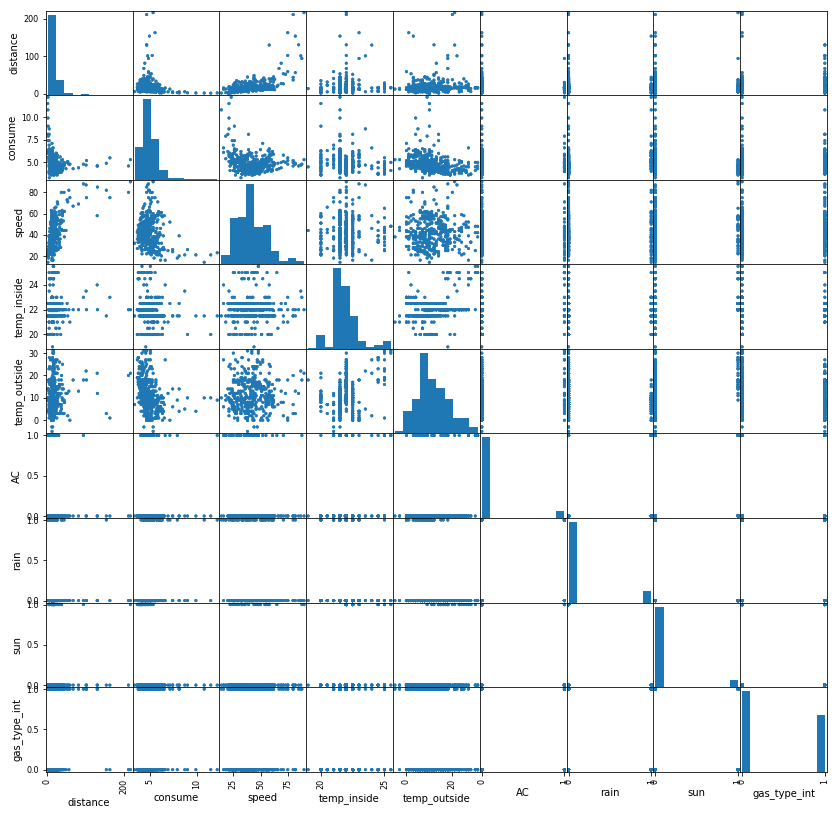

In [27]:
# 散布図行列を書いてみる
pd.plotting.scatter_matrix(df_consume_concat, figsize=(14,14))
plt.show()

In [28]:
# 相関係数を確認
df_consume_concat.corr()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,gas_type_int
distance,1.000000,-0.128967,0.562299,0.075178,0.088175,-0.025738,-0.019791,0.081120,0.053411
consume,-0.128967,1.000000,-0.227866,-0.160623,-0.320811,0.096591,0.248118,-0.170667,0.015327
speed,0.562299,-0.227866,1.000000,0.059293,0.015411,-0.035408,0.009489,0.081618,0.097360
temp_inside,0.075178,-0.160623,0.059293,1.000000,0.359500,0.297376,-0.036937,0.242248,-0.010198
temp_outside,0.088175,-0.320811,0.015411,0.359500,1.000000,0.167562,-0.186315,0.346903,-0.148705
AC,-0.025738,0.096591,-0.035408,0.297376,0.167562,1.000000,0.242915,0.088598,-0.105285
rain,-0.019791,0.248118,0.009489,-0.036937,-0.186315,0.242915,1.000000,-0.112650,-0.060328
sun,0.081120,-0.170667,0.081618,0.242248,0.346903,0.088598,-0.112650,1.000000,-0.022761
gas_type_int,0.053411,0.015327,0.097360,-0.010198,-0.148705,-0.105285,-0.060328,-0.022761,1.000000


In [29]:
#説明変数を3つ選択
X, y = df_consume_concat[["temp_outside", "speed", "rain"]].values, df_consume_concat["consume"].values
#学習データ、テストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
#標準化処理
stdsc = StandardScaler()
X_train_stand = stdsc.fit_transform(X_train)
X_test_stand  = stdsc.transform(X_test)#fitは上のを引き継ぐ

for i in range(26):
    alp = i * 2
    #consumeと説明変数3つとの線形回帰
    # 係数を求める
    print("☆λ = {}のとき☆".format(alp))
    l2regr = Ridge(alpha = alp)
    l2regr.fit(X_train_stand, y_train)

    # 重みを取り出す
    w0 = l2regr.intercept_
    w1 = l2regr.coef_[0]
    w2 = l2regr.coef_[1]
    w3 = l2regr.coef_[2]

    # 重みと二乗誤差の確認
    # 学習用データに対する予測を実行
    y_pred_train = l2regr.predict(X_train_stand)
    squared_error = 0.5 * np.sum((y_train - y_pred_train) ** 2)
    print('w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}, w3 = {:.3f}'.format(w0, w1, w2, w3))
    print('学習時の二乗誤差 = {:.3f}'.format(squared_error))

    from sklearn.metrics import mean_squared_error, mean_absolute_error # 回帰問題における性能評価に関する関数

    # MSEを計算
    mse = mean_squared_error(y_train, y_pred_train) 
    print("MSE = %s"%round(mse, 3) )  

    # MAEを計算
    mae = mean_absolute_error(y_train, y_pred_train) 
    print("MAE = %s"%round(mae, 3) )

    # RMSEを計算
    rmse = np.sqrt(mse)
    print("RMSE = %s"%round(rmse, 3) )

    # テストデータに対する予測を実行
    y_pred_test = l2regr.predict(X_test_stand)
    squared_error_test = 0.5 * np.sum((y_test - y_pred_test) ** 2)
    print('テスト時の二乗誤差 = {:.3f}'.format(squared_error_test))

    # MSEを計算
    mse = mean_squared_error(y_test, y_pred_test) 
    print("MSE = %s"%round(mse, 3) )  

    # MAEを計算
    mae = mean_absolute_error(y_test, y_pred_test) 
    print("MAE = %s"%round(mae, 3) )

    # RMSEを計算
    rmse = np.sqrt(mse)
    print("RMSE = %s"%round(rmse, 3) )
    print()

☆λ = 0のとき☆
w0 = 4.924, w1 = -0.295, w2 = -0.223, w3 = 0.238
学習時の二乗誤差 = 412.368
MSE = 0.85
MAE = 0.617
RMSE = 0.922
テスト時の二乗誤差 = 424.896
MSE = 0.876
MAE = 0.628
RMSE = 0.936

☆λ = 2のとき☆
w0 = 4.924, w1 = -0.294, w2 = -0.223, w3 = 0.238
学習時の二乗誤差 = 412.368
MSE = 0.85
MAE = 0.617
RMSE = 0.922
テスト時の二乗誤差 = 424.872
MSE = 0.876
MAE = 0.627
RMSE = 0.936

☆λ = 4のとき☆
w0 = 4.924, w1 = -0.294, w2 = -0.222, w3 = 0.237
学習時の二乗誤差 = 412.369
MSE = 0.85
MAE = 0.617
RMSE = 0.922
テスト時の二乗誤差 = 424.848
MSE = 0.876
MAE = 0.627
RMSE = 0.936

☆λ = 6のとき☆
w0 = 4.924, w1 = -0.293, w2 = -0.222, w3 = 0.237
学習時の二乗誤差 = 412.371
MSE = 0.85
MAE = 0.617
RMSE = 0.922
テスト時の二乗誤差 = 424.826
MSE = 0.876
MAE = 0.627
RMSE = 0.936

☆λ = 8のとき☆
w0 = 4.924, w1 = -0.293, w2 = -0.221, w3 = 0.237
学習時の二乗誤差 = 412.373
MSE = 0.85
MAE = 0.617
RMSE = 0.922
テスト時の二乗誤差 = 424.804
MSE = 0.876
MAE = 0.627
RMSE = 0.936

☆λ = 10のとき☆
w0 = 4.924, w1 = -0.292, w2 = -0.221, w3 = 0.236
学習時の二乗誤差 = 412.376
MSE = 0.85
MAE = 0.617
RMSE = 0.922
テスト時の二乗誤差 = 424.783

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


同じデータを増やしたところで、ほぼ変化しないと判る。